In [ ]:
#define response variable
y <- mtcars$hp

#define matrix of predictor variables
x <- data.matrix(mtcars[, c('mpg', 'wt', 'drat', 'qsec')])

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


Loading required package: Matrix

Loaded glmnet 4.1-1



[1] 1.675719

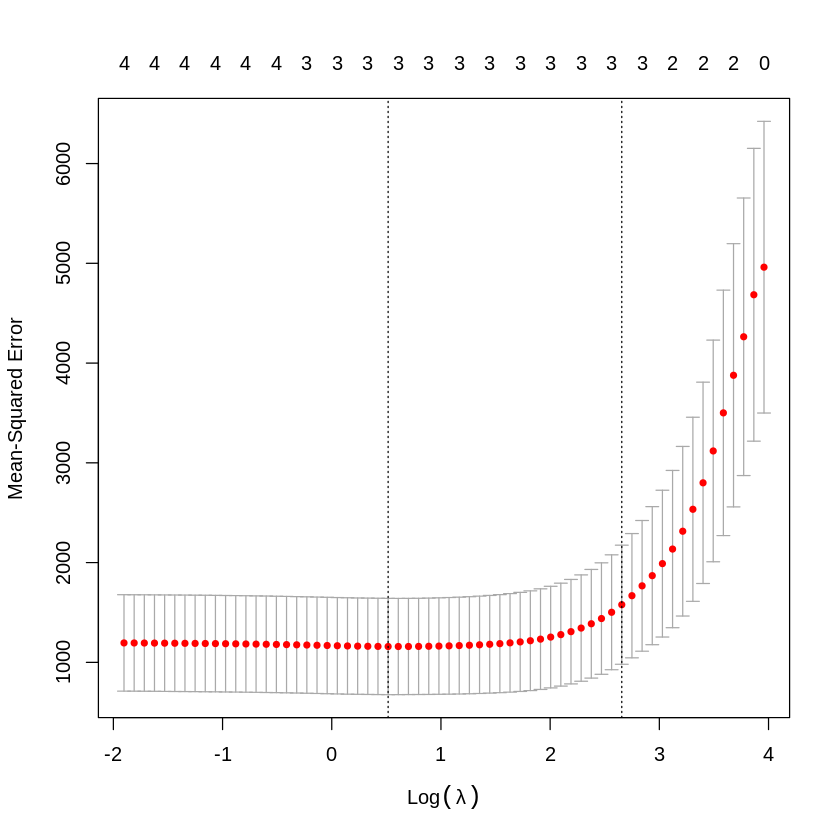

In [ ]:
install.packages('glmnet')
library(glmnet)

#perform k-fold cross-validation to find optimal lambda value
cv_model <- cv.glmnet(x, y, alpha = 1)

#find optimal lambda value that minimizes test MSE
best_lambda <- cv_model$lambda.min
best_lambda

#produce plot of test MSE by lambda value
plot(cv_model)

In [ ]:
#find coefficients of best model
best_model <- glmnet(x, y, alpha = 1, lambda = best_lambda)
coef(best_model)

5 x 1 sparse Matrix of class "dgCMatrix"
                    s0
(Intercept) 488.165309
mpg          -2.867126
wt           22.715728
drat          .       
qsec        -19.999027

In [ ]:
#define new observation
new = matrix(c(24, 2.5, 3.5, 18.5), nrow=1, ncol=4)

#use lasso regression model to predict response value
predict(best_model, s = best_lambda, newx = new)


1
106.1616


In [ ]:
lm(hp ~ mpg + wt + drat + qsec, mtcars)


Call:
lm(formula = hp ~ mpg + wt + drat + qsec, data = mtcars)

Coefficients:
(Intercept)          mpg           wt         drat         qsec  
    473.779       -2.877       26.037        4.819      -20.751  
